# EXPLORATORY DATA ANALYSIS ON SUPER_STORE DATA IN NIGERIA AND PROFIT PREDICTION

Problem Statement:
1. Perform Exploratory Data Analysis on Dataset super_store data.
2. As a business manager, try to find out the weak areas where you can work to make more profit.
3. What business you can derive by exploring the data.
4. Build a machine learning model to predict if there will be profit or loss.

In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import csv file 
df = pd.read_csv('C:\Users\User\Desktop\Streamlit Folder\store/SuperstoreNigeria.csv')

In [3]:
# check the first five rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1,o1,2016-11-08,2016-11-11,Second Class,1,Consumer,Nigeria,Abia,South,a1,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,o2,2016-11-08,2016-11-11,Second Class,2,Consumer,Nigeria,Abia,South,a2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,3,o3,2016-06-12,2016-06-16,Second Class,3,Corporate,Nigeria,Lagos,West,a3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,4,o4,2015-10-11,2015-10-18,Standard Class,4,Consumer,Nigeria,Kaduna,South,a4,Furniture,Tables,957.5775,5,0.45,-383.0310
4,5,o5,2015-10-11,2015-10-18,Standard Class,5,Consumer,Nigeria,Kaduna,South,a5,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# check the shape of the data
df.shape

(9994, 17)

there are 9994 rows and 17 columns. 

In [5]:
# check all the columns in the data
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

these are the names of features. profit is the target.

In [6]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   datetime64[ns]
 4   Ship Mode     9994 non-null   object        
 5   Customer ID   9994 non-null   int64         
 6   Segment       9994 non-null   object        
 7   Country       9994 non-null   object        
 8   State         9994 non-null   object        
 9   Region        9994 non-null   object        
 10  Product ID    9994 non-null   object        
 11  Category      9994 non-null   object        
 12  Sub-Category  9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

there are 9 categorical and 6 numerical features

In [7]:
# check for missing values
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

there is no missing values in any features 

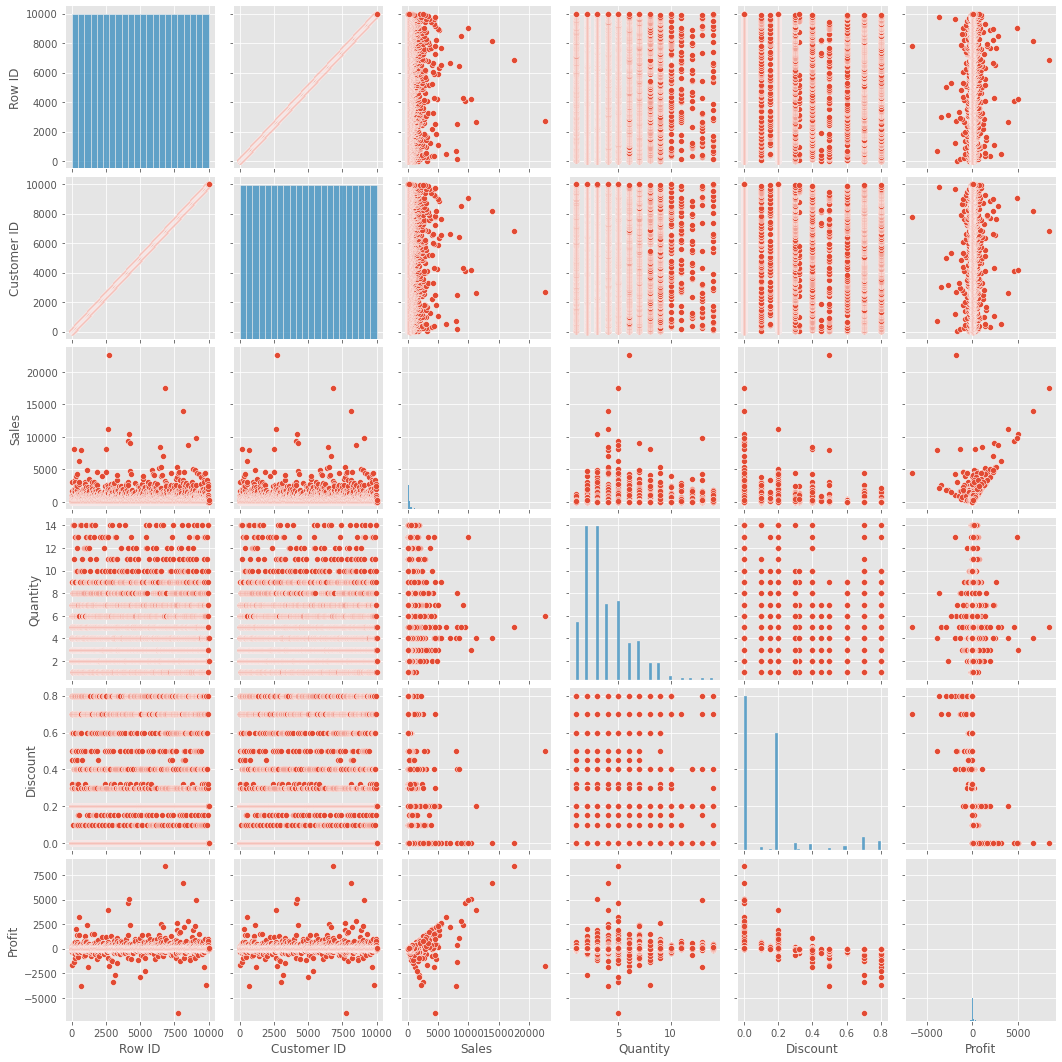

In [8]:
# check for data correlation
sns.pairplot(df)

this shows distribution of numerical features along each other

<AxesSubplot:>

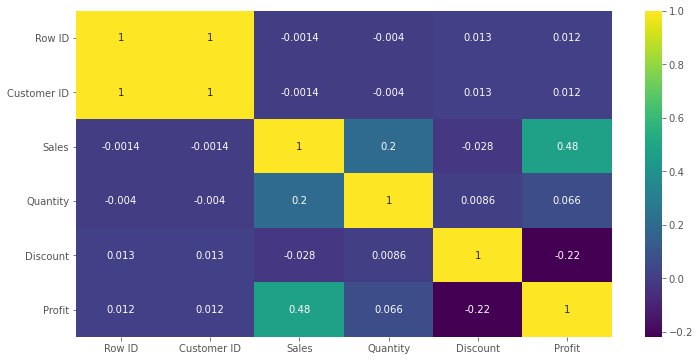

In [9]:
# check for correlation score of each numerical features

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Discount and sales are very correlated with targeted feature(profit)

In [10]:
# let's check how many cities in which the sales took place
df.State.nunique()

40

there are 40 cities in which sales operation operate

In [11]:
# SEGMENT BY ROW_COUNTS
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

consumer has the highest number among the segment

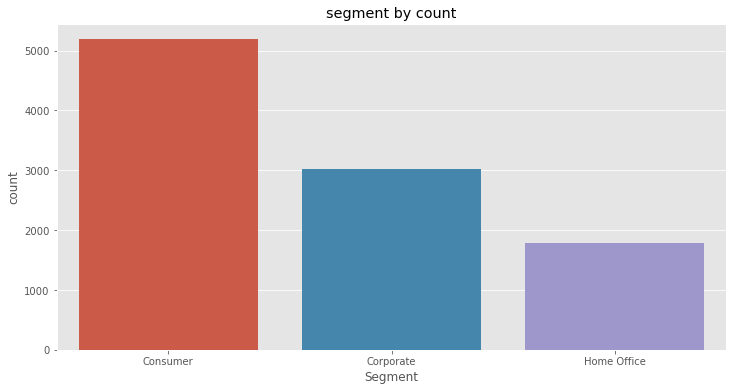

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Segment',data=df)
plt.title('segment by count');

from the above graph consumer has the highest number among the segment

In [13]:
# SHIP_MODE BY ROW_COUNTS
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

standard class has the highest number among ship_mode

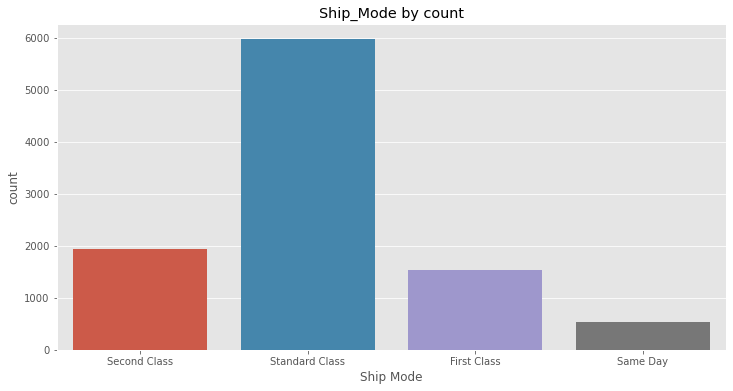

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ship Mode',data=df)
plt.title('Ship_Mode by count');

from the above graph it shows that standard class has the highest number among ship_mode

In [15]:
# REGION BY ROW_COUNTS
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

west has the highest number among the Region

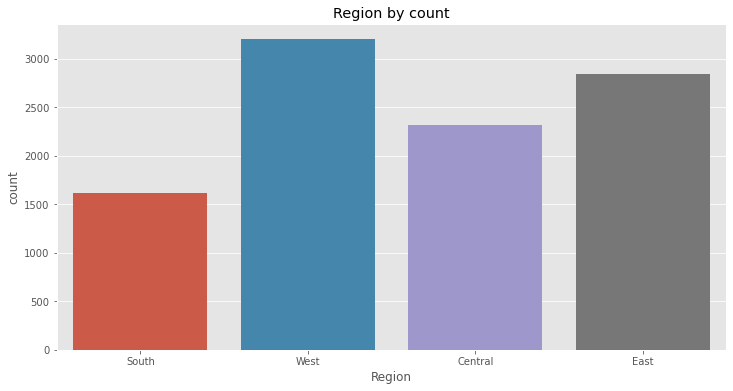

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region',data=df)
plt.title('Region by count');

from the above graph it shows that west has the highest number among the Region

In [17]:
# CATEGORY BY ROW_COUNTS
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

office supplies has the highest number among the category

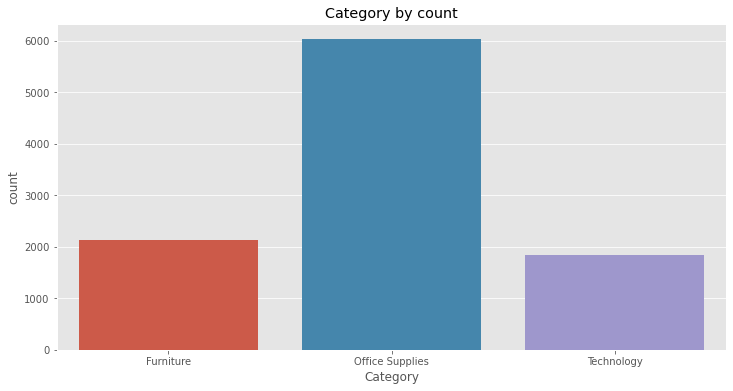

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category',data=df)
plt.title('Category by count');

from the above graph it shows that office supplies has the highest number among the category

In [19]:
# SUB_CATEGORY BY ROW_COUNTS
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

binders has the highest number among sub_category 

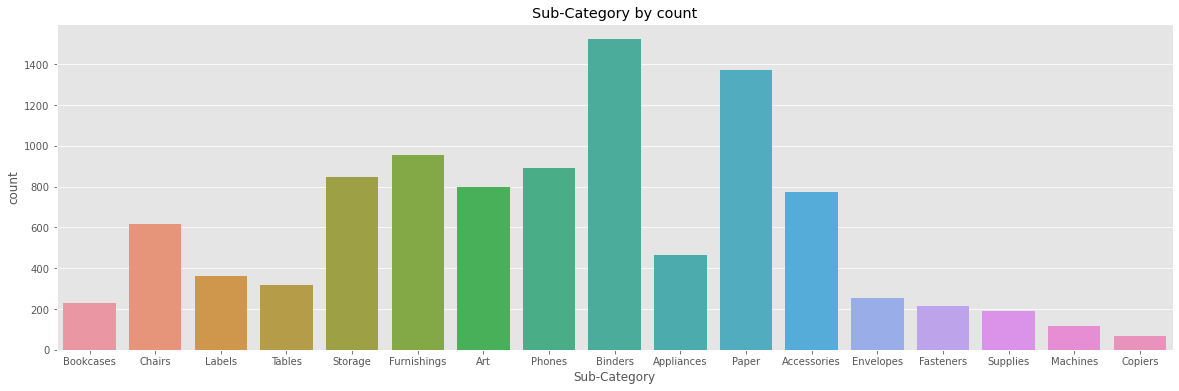

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x='Sub-Category',data=df)
plt.title('Sub-Category by count');

from the above graph it shows that binders has the highest number among sub_category

In [21]:
# checking top 10 state with highest number of sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False)[:10]
pd.DataFrame(state_sales).reset_index()

,State,Sales
0,Lagos,457687.6315
1,Cross River,310876.2710
2,Imo,171503.6058
3,Rivers,138641.2700
4,FCT,117431.8240
5,Kaduna,89473.7080
6,Katsina,80166.1010
7,Adamawa,78258.1360
8,Delta,76269.6140
9,Bayelsa,71846.5440


Text(0.5, 1.0, 'top 10 state by total of sales')

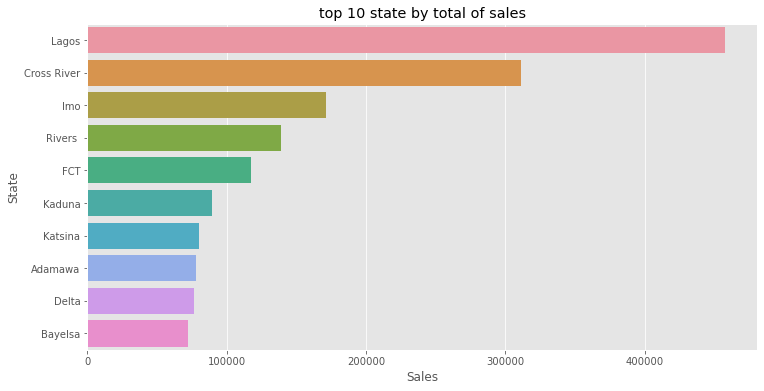

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x='Sales',y='State',data=pd.DataFrame(state_sales).reset_index())
plt.title('top 10 state by total of sales')

From the barplot it shows that Lagos has highest number of sales 

In [23]:
# checking category with highest number of sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)[:10]
pd.DataFrame(category_sales).reset_index()

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


Text(0.5, 1.0, 'category by total of sales')

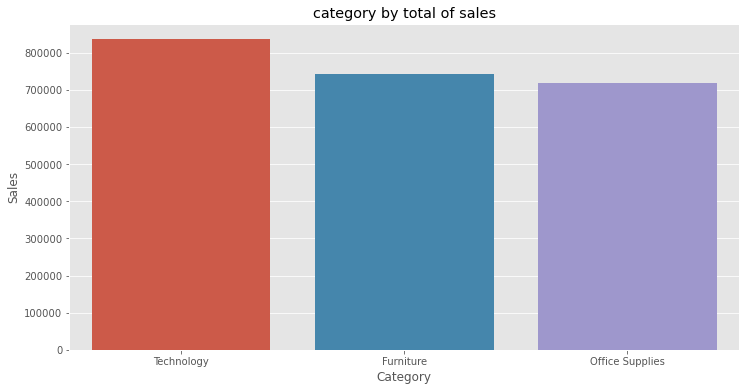

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(x='Category',y='Sales',data=pd.DataFrame(category_sales).reset_index())
plt.title('category by total of sales')

from the graph it shows that Technology has highest number of sales

In [25]:
# checking top 10 sub-category with highest number of sales
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending = False)[:10]
pd.DataFrame(sub_category_sales).reset_index()

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


Text(0.5, 1.0, 'top 10 sub_category by total of sales')

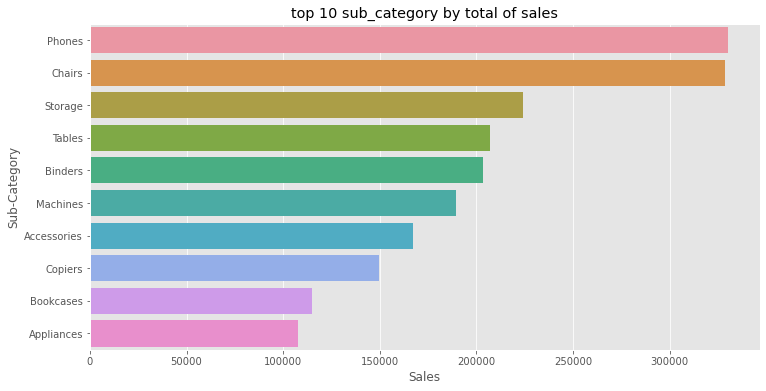

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x='Sales',y='Sub-Category',data=pd.DataFrame(sub_category_sales).reset_index())
plt.title('top 10 sub_category by total of sales')

In [27]:
# checking top 10 state with highest number of profit
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False)[:10]
pd.DataFrame(state_profit).reset_index()

,State,Profit
0,Lagos,76381.3871
1,Cross River,74038.5486
2,Rivers,33402.6517
3,Delta,24463.1876
4,Bayelsa,18783.8720
5,Osun,18382.9363
6,Ogun,16250.0433
7,Ebonyi,12222.3531
8,Ekiti,11659.6309
9,Abia,11199.6966


Text(0.5, 1.0, 'top 10 state with highest number of profit')

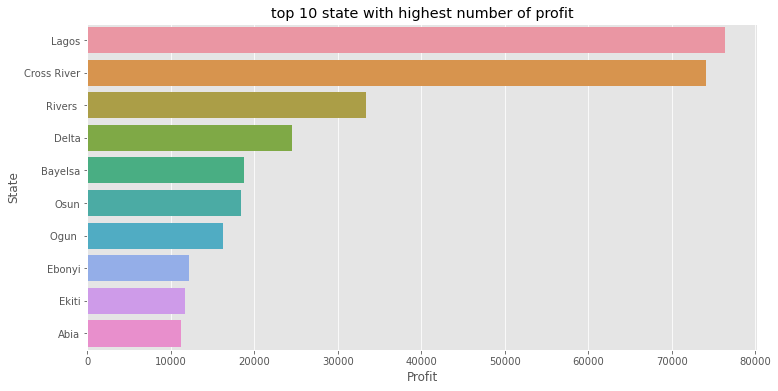

In [28]:
plt.figure(figsize = (12,6))
sns.barplot(x='Profit',y='State',data=pd.DataFrame(state_profit).reset_index())
plt.title('top 10 state with highest number of profit')

Lagos state has highest number of profit

In [29]:
# checking top 10 state with highest number of loss
profit_sum=df.groupby('State')['Profit'].sum().reset_index()
loss = profit_sum[profit_sum['Profit']< 0]
state_loss = loss.groupby('State')['Profit'].sum().sort_values(ascending = True)[:10].reset_index()
state_loss.rename(columns={'Profit':'Loss'},inplace=True)
state_loss

,State,Loss
0,Imo,-25334.5280
1,Adamawa,-16971.3766
2,FCT,-15329.8106
3,Katsina,-12607.8870
4,Enugu,-7490.9122
5,Bauchi,-6527.8579
6,Akwa Ibom,-5341.6936
7,Edo,-3427.9246
8,Kaduna,-3399.3017
9,Borno,-1090.2745


Text(0.5, 1.0, 'top 10 state with highest number of Loss')

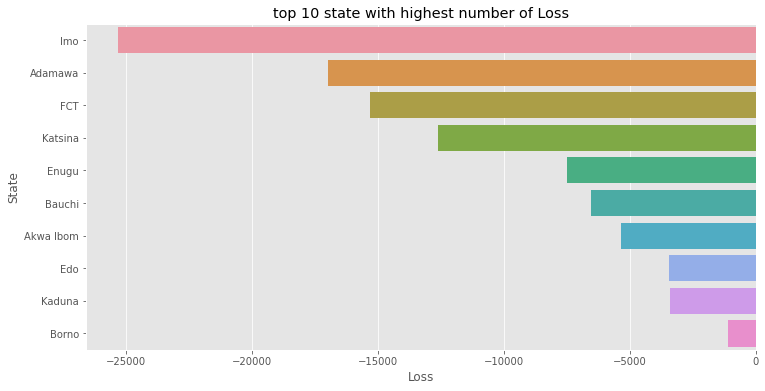

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(x='Loss',y='State',data = state_loss)
plt.title('top 10 state with highest number of Loss')

Imo state has highest number of loss

In [31]:
# checking category with highest number of profit
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending = False)[:10].reset_index()
category_profit

,Category,Profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


Text(0.5, 1.0, 'category with highest number of profit')

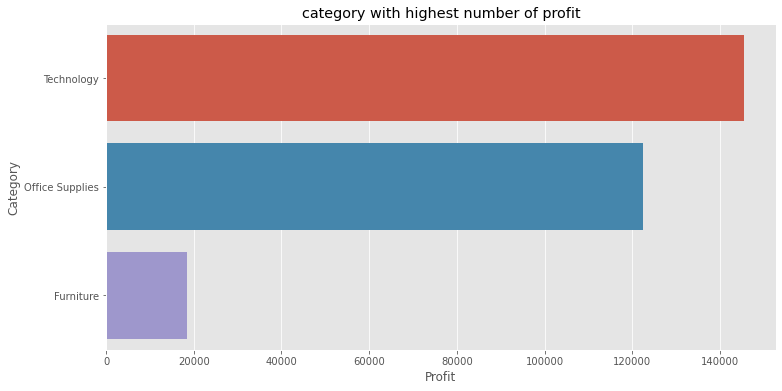

In [32]:
plt.figure(figsize = (12,6))
sns.barplot(x='Profit',y='Category',data= category_profit)
plt.title('category with highest number of profit')

Technology category has highest number of profit

In [33]:
# checking top 10 sub_category with highest number of profit
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)[:10].reset_index()
sub_category_profit

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


Text(0.5, 1.0, 'top 10 sub_category with highest number of profit')

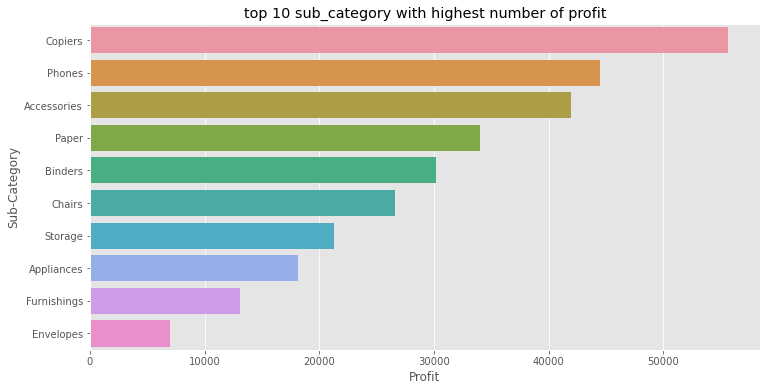

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x='Profit',y='Sub-Category',data= sub_category_profit)
plt.title('top 10 sub_category with highest number of profit')

copiers has highest number of profit

In [35]:
# checking top 10 sub_category with highest number of loss
profit_sum = df.groupby('Sub-Category')['Profit'].sum().reset_index()
loss=profit_sum[profit_sum.Profit < 0 ]
sub_category_loss = loss.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = True)[:10].reset_index()
sub_category_loss.rename(columns={'Profit':'Loss'},inplace=True)
sub_category_loss

,Sub-Category,Loss
0,Tables,-17725.4811
1,Bookcases,-3472.5560
2,Supplies,-1189.0995


Text(0.5, 1.0, 'top 10 sub_category with highest number of Loss')

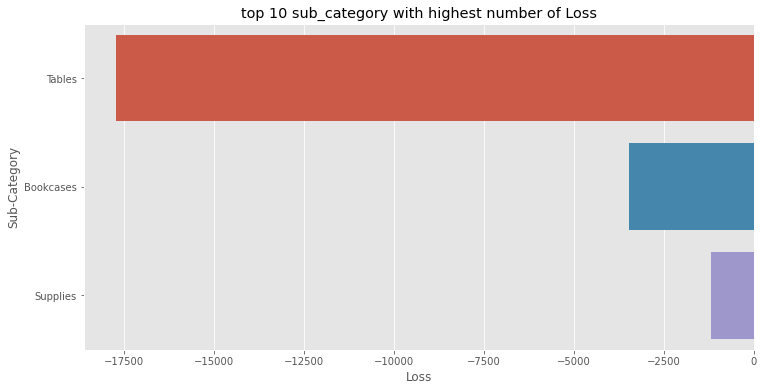

In [36]:
plt.figure(figsize = (12,6))
sns.barplot(x='Loss',y='Sub-Category',data = sub_category_loss)
plt.title('top 10 sub_category with highest number of Loss')

Tables has highest number of loss

In [37]:
negative_state = []
positive_state = []
profit_of_state = []
loss_of_state = []
for state in df['State'].unique():
    if df['Profit'][df['State']==state].sum()<=0:
        negative_state.append(state)
        loss_of_state.append(df['Profit'][df['State']==state].sum())
    else:
        positive_state.append(state)
        profit_of_state.append(df['Profit'][df['State']==state].sum())

In [38]:
len(negative_state)

10

there are 10 states which generating loss

In [39]:
len(positive_state)

30

there are 10 states which generating profit

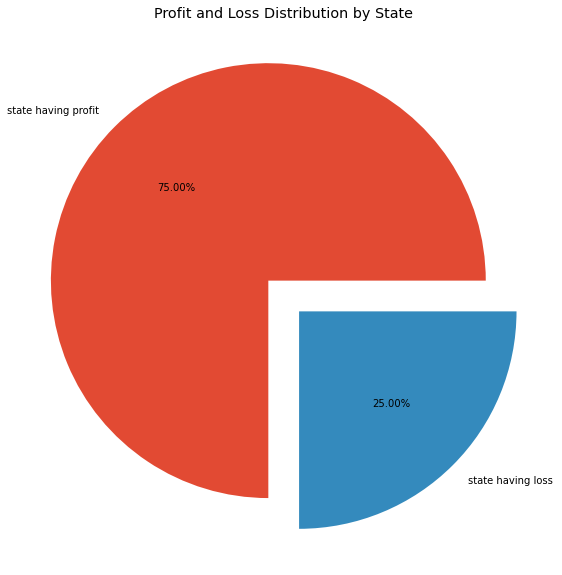

In [40]:
plt.figure(figsize=(10,10))
myexplode = [0.1,0.1]
plt.pie([len(positive_state),len(negative_state)],explode=myexplode,autopct='%1.2f%%', labels = ["state having profit","state having loss"])
plt.title("Profit and Loss Distribution by State")
plt.show()

75% of state are generating profit and 25% of state are generating loss

In [41]:
# checking segment with highest number of profit
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending = False)[:10].reset_index()
segment_profit

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


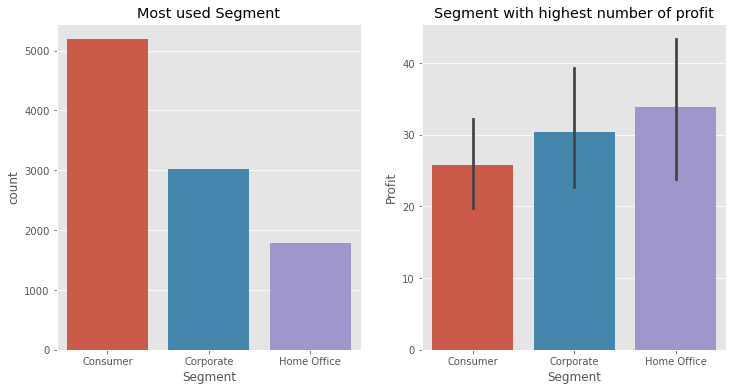

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Segment',data=df)
plt.title('Most used Segment')
plt.subplot(1,2,2)
sns.barplot(x='Segment',y='Profit', data = df)
plt.title('Segment with highest number of profit')
plt.show()

left bar chart shows that comsumer type of segment is used in most of the sales operations

right bar chart shows that home office type of segment generate more profit but consumer type of segment generate very less profit

In [43]:
# checking region with highest number of profit
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending = False)[:10].reset_index()
region_profit

,Region,Profit
0,West,108418.4489
1,East,91522.7800
2,South,46749.4303
3,Central,39706.3625


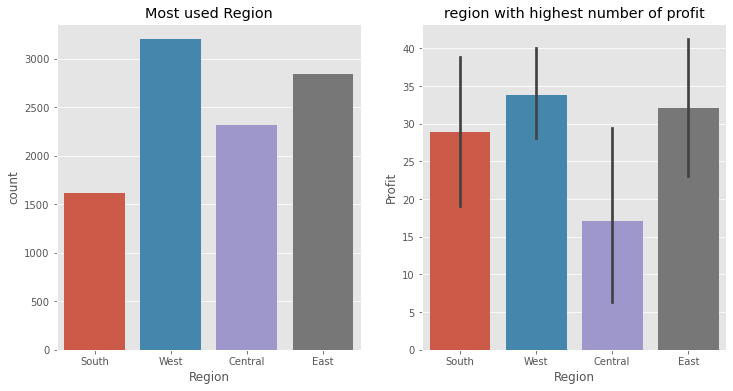

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Region',data=df)
plt.title('Most used Region')
plt.subplot(1,2,2)
sns.barplot(x='Region',y='Profit', data = df)
plt.title('region with highest number of profit')
plt.show()

left bar chart shows that most of the sales operations occured in west region

right bar chart shows that west region generate more profit but central region generate very less profit

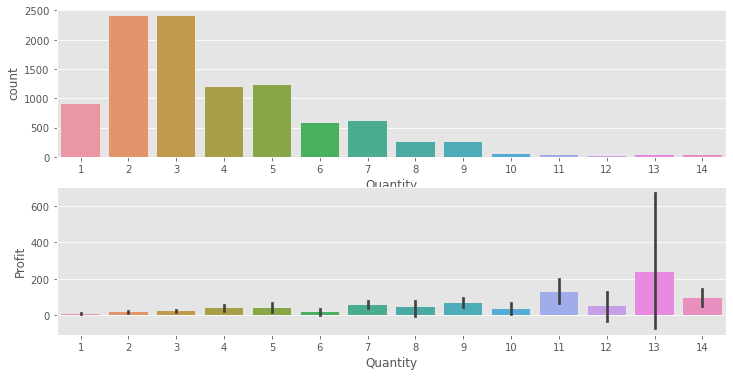

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.countplot(x='Quantity',data=df)
plt.subplot(2,1,2)
sns.barplot(x='Quantity',y='Profit', data = df)
plt.show()

upper bar chart shows that products of quantity 2 and 3 is used in most sales operation

lower bar chart shows that products of quantity 11 and 13 generates more profit

Text(0.5, 1.0, 'Profit vs Quantity')

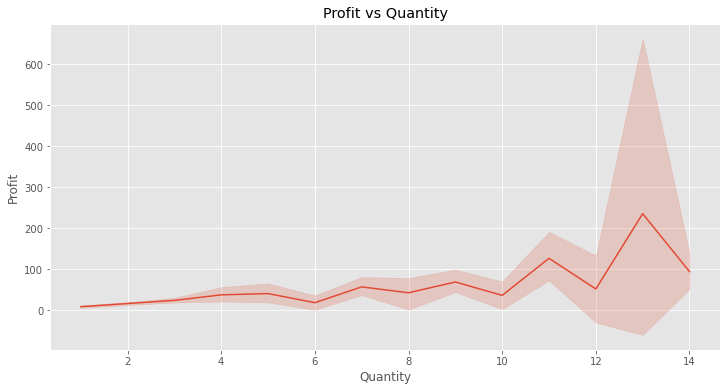

In [46]:
# line chart of profit vs quantity
plt.figure(figsize=(12,6))
sns.lineplot(x='Quantity',y='Profit',data=df)
plt.title('Profit vs Quantity')

by looking on this graph it shown that if quantity of products increase then there is highh chance of increase in profit

Text(0.5, 1.0, 'Discount by profit')

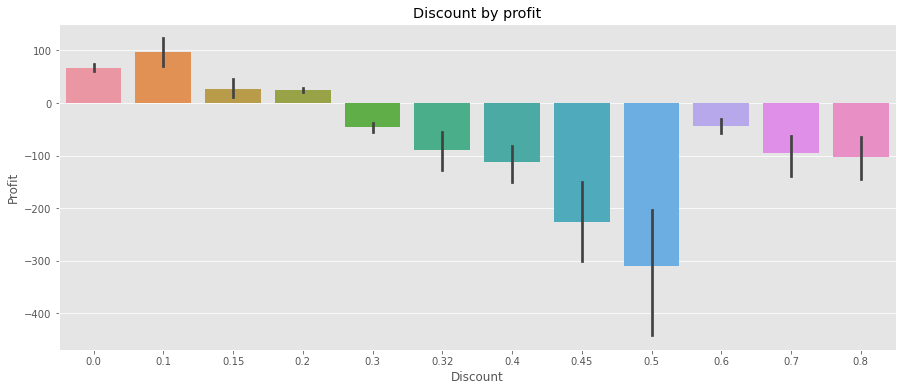

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x='Discount',y='Profit', data = df)
plt.title('Discount by profit')

from the graph above it shows that if discount is 10 percent then it will generate more profit.

if discount is between 15% to 20% it will generate less profit.

if discount is increasing more than 20% it will generate loss'

Text(0.5, 1.0, 'Profit vs Discount')

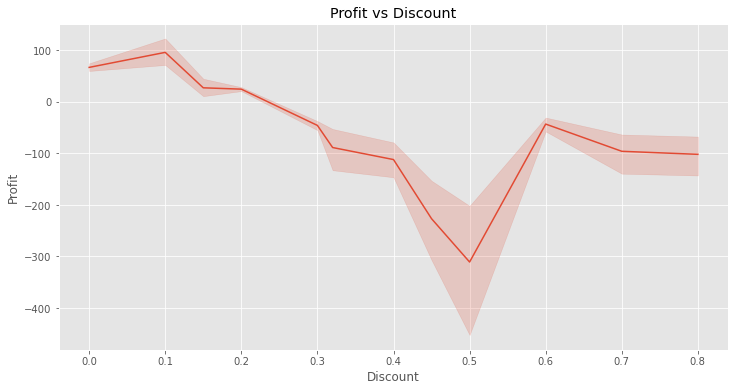

In [48]:
# line chart of profit vs discount
plt.figure(figsize=(12,6))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title('Profit vs Discount')

this graph show that there is negative correlation between discount and profit. that is as discount is increasing profit will be decreasing

<AxesSubplot:xlabel='Sales', ylabel='Density'>

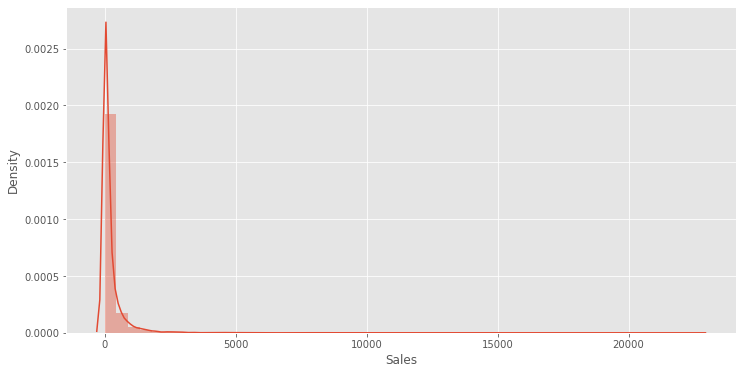

In [49]:
# exploring sales feature
plt.figure(figsize=(12,6))
sns.distplot(df['Sales'])

this shows that most of sales operations are performed near to 0 sales

# Conclusions:

These are the recommendations to generate more profit

1. Discount

we have to limit our discount from 0% to 10%

2. Category

we have to increase sales of that product which comes under technology category

3. Sub-Category

we have to increase sales of that things which comes under Copiers sub-category.

Tables,Bookcases,supplies from sub-category generate loss so we have to reduced sales from them

4. Segment

we have to choose home office segment to genearte more profit

5. Quantity

Quantity of items should be in between 1 t0 11

6. Region

central region generates very less profit so we have to reduce our sales operations in central region and increase our sales in west region

7. States 

there are 10 state thet generate loss so we have to reduce our sales operation in these states.

there are 10 state that generate most profit we can increase sales in those states.

# NOW LET'S BUILD MODEL TO PREDICT PROFIT

Data Preprocessing

In [50]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1,o1,2016-11-08,2016-11-11,Second Class,1,Consumer,Nigeria,Abia,South,a1,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,o2,2016-11-08,2016-11-11,Second Class,2,Consumer,Nigeria,Abia,South,a2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,3,o3,2016-06-12,2016-06-16,Second Class,3,Corporate,Nigeria,Lagos,West,a3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,4,o4,2015-10-11,2015-10-18,Standard Class,4,Consumer,Nigeria,Kaduna,South,a4,Furniture,Tables,957.5775,5,0.45,-383.0310
4,5,o5,2015-10-11,2015-10-18,Standard Class,5,Consumer,Nigeria,Kaduna,South,a5,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
#drop columns that is not useful to build the model
df.drop(['Order ID','Order Date','Ship Date','Customer ID','Product ID','Country'],axis=1,inplace=True)

In [52]:
#set row id as index 
df.set_index('Row ID',inplace = True)
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,
1,Second Class,Consumer,Abia,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,Abia,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,Lagos,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,Kaduna,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,Kaduna,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [53]:
# Encoding
def get_categorical_uniques(data):
    categorical_column = [column for column in data.dtypes.index if data.dtypes[column]=='object']
    categorical_unique = {column: data[column].unique() for column in categorical_column}
    return (categorical_unique)

In [54]:
get_categorical_uniques(df)

{'Ship Mode': array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 'Segment': array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 'State': array(['Abia', 'Lagos', 'Kaduna', 'Enugu', 'Rivers ', 'Imo', 'Oyo ',
        'Kano', 'Kwara ', 'FCT', 'Katsina', 'Ekiti', 'Delta', 'Ebonyi',
        'Osun', 'Cross River', 'Edo', 'Bayelsa', 'Akwa Ibom', 'Benue',
        'Anambra', 'Borno', 'Bauchi', 'Gombe', 'Adamawa', 'Niger',
        'Jigawa', 'Kebbi ', 'Kogi', 'Nasarawa', 'Niger ', 'Ondo', 'Ogun ',
        'Sokoto', 'Plateau', 'Yobe ', 'Zamfara ', 'Zamfara', 'Rivers',
        'Kaduna '], dtype=object),
 'Region': array(['South', 'West', 'Central', 'East'], dtype=object),
 'Category': array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
 'Sub-Category': array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
        'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
        'Accessories', 'Envelopes', 'Fasteners

In [55]:
sh_mode = list(df['Ship Mode'].unique())
sh_mode

['Second Class', 'Standard Class', 'First Class', 'Same Day']

In [56]:
seg = list(df['Segment'].unique())
seg

['Consumer', 'Corporate', 'Home Office']

In [57]:
reg = list(df['Region'].unique())
reg

['South', 'West', 'Central', 'East']

In [58]:
cat = list(df['Category'].unique())
cat

['Furniture', 'Office Supplies', 'Technology']

In [59]:
sub = list(df['Sub-Category'].unique())
sub

['Bookcases',
 'Chairs',
 'Labels',
 'Tables',
 'Storage',
 'Furnishings',
 'Art',
 'Phones',
 'Binders',
 'Appliances',
 'Paper',
 'Accessories',
 'Envelopes',
 'Fasteners',
 'Supplies',
 'Machines',
 'Copiers']

In [60]:
sta = list(df['State'].unique())
sta

['Abia',
 'Lagos',
 'Kaduna',
 'Enugu',
 'Rivers ',
 'Imo',
 'Oyo ',
 'Kano',
 'Kwara ',
 'FCT',
 'Katsina',
 'Ekiti',
 'Delta',
 'Ebonyi',
 'Osun',
 'Cross River',
 'Edo',
 'Bayelsa',
 'Akwa Ibom',
 'Benue',
 'Anambra',
 'Borno',
 'Bauchi',
 'Gombe',
 'Adamawa',
 'Niger',
 'Jigawa',
 'Kebbi ',
 'Kogi',
 'Nasarawa',
 'Niger ',
 'Ondo',
 'Ogun ',
 'Sokoto',
 'Plateau',
 'Yobe ',
 'Zamfara ',
 'Zamfara',
 'Rivers',
 'Kaduna ']

In [61]:
ship = {label: index for index, label in enumerate(sh_mode)}
ship

{'Second Class': 0, 'Standard Class': 1, 'First Class': 2, 'Same Day': 3}

In [62]:
segment = {label: index for index, label in enumerate(seg)}
segment

{'Consumer': 0, 'Corporate': 1, 'Home Office': 2}

In [63]:
region = {label: index for index, label in enumerate(reg)}
region

{'South': 0, 'West': 1, 'Central': 2, 'East': 3}

In [64]:
category = {label: index for index, label in enumerate(cat)}
category

{'Furniture': 0, 'Office Supplies': 1, 'Technology': 2}

In [65]:
sub_category = {label: index for index, label in enumerate(sub)}
sub_category

{'Bookcases': 0,
 'Chairs': 1,
 'Labels': 2,
 'Tables': 3,
 'Storage': 4,
 'Furnishings': 5,
 'Art': 6,
 'Phones': 7,
 'Binders': 8,
 'Appliances': 9,
 'Paper': 10,
 'Accessories': 11,
 'Envelopes': 12,
 'Fasteners': 13,
 'Supplies': 14,
 'Machines': 15,
 'Copiers': 16}

In [66]:
state = {label: index for index, label in enumerate(sta)}
state

{'Abia': 0,
 'Lagos': 1,
 'Kaduna': 2,
 'Enugu': 3,
 'Rivers ': 4,
 'Imo': 5,
 'Oyo ': 6,
 'Kano': 7,
 'Kwara ': 8,
 'FCT': 9,
 'Katsina': 10,
 'Ekiti': 11,
 'Delta': 12,
 'Ebonyi': 13,
 'Osun': 14,
 'Cross River': 15,
 'Edo': 16,
 'Bayelsa': 17,
 'Akwa Ibom': 18,
 'Benue': 19,
 'Anambra': 20,
 'Borno': 21,
 'Bauchi': 22,
 'Gombe': 23,
 'Adamawa': 24,
 'Niger': 25,
 'Jigawa': 26,
 'Kebbi ': 27,
 'Kogi': 28,
 'Nasarawa': 29,
 'Niger ': 30,
 'Ondo': 31,
 'Ogun ': 32,
 'Sokoto': 33,
 'Plateau': 34,
 'Yobe ': 35,
 'Zamfara ': 36,
 'Zamfara': 37,
 'Rivers': 38,
 'Kaduna ': 39}

In [67]:
df['Ship Mode'] = df['Ship Mode'].apply(lambda x: ship[x])
df['Segment'] = df['Segment'].apply(lambda x: segment[x])
df['Region'] = df['Region'].apply(lambda x: region[x])
df['Category'] = df['Category'].apply(lambda x: category[x])
df['Sub-Category'] = df['Sub-Category'].apply(lambda x: sub_category[x])
df['State'] = df['State'].apply(lambda x: state[x])

In [68]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,
1,0,0,0,0,0,0,261.9600,2,0.00,41.9136
2,0,0,0,0,0,1,731.9400,3,0.00,219.5820
3,0,1,1,1,1,2,14.6200,2,0.00,6.8714
4,1,0,2,0,0,3,957.5775,5,0.45,-383.0310
5,1,0,2,0,1,4,22.3680,2,0.20,2.5164


In [69]:
# we have to label profit as 1 and loss as 0
df['Profit'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

In [70]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,
1,0,0,0,0,0,0,261.9600,2,0.00,1
2,0,0,0,0,0,1,731.9400,3,0.00,1
3,0,1,1,1,1,2,14.6200,2,0.00,1
4,1,0,2,0,0,3,957.5775,5,0.45,0
5,1,0,2,0,1,4,22.3680,2,0.20,1


In [71]:
# splitting the data into feature and target
x = df.drop('Profit',axis=1)
y = df.Profit

In [72]:
model = sm.OLS(y,x).fit()
model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              6145.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):                        0.00
Time:                        01:26:25   Log-Likelihood:                         -3722.1
No. Observations:                9994   AIC:                                      7462.
Df Residuals:                    9985   BIC:                                      7527.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Ship Mode        0.1206      0.004     27.667      0.000       0.112       0.129
Segment          0.0682      0.005     15.123      0.000       0.059       0.077
State            0.0037      0.000      9.768      0.000       0.003       0.004
Region           0.0632      0.003     18.675      0.000       0.057       0.070
Category         0.0870      0.007     12.590      0.000       0.073       0.101
Sub-Category     0.0454      0.001     39.210      0.000       0.043       0.048
Sales        -2.633e-05   5.77e-06     -4.564      0.000   -3.76e-05    -1.5e-05
Quantity         0.0535      0.001     37.136      0.000       0.051       0.056
Discount        -1.1687      0.017    -69.108      0.000      -1.202      -1.136
==============================================================================
Omnibus:                      443.023   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.673
Skew:                          -0.454   Prob(JB):                    1.34e-126
Kurtosis:                       3.752   Cond. No.                     3.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [74]:
print(x_train.shape,x_test.shape)

(7995, 9) (1999, 9)


In [75]:
#scaling x_train,x_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [76]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    model.fit(x_train,y_train)

In [77]:
model_names = [
    'LogisticRegression',
    'RandomForestClassifier',
    'DecisionTreeClassifier',
    'SVC'
]

for model, name in zip (models,model_names):
    print(name+ ':{:.2f}%'.format(model.score(x_test,y_test)*100))

LogisticRegression:94.05%
RandomForestClassifier:94.65%
DecisionTreeClassifier:93.15%
SVC:93.85%


from the above models RandomForestClassfier perform better with accuracy of 94.65%